**Supervised**


Supervised Learning means that we will have labeled historical data that we will use to inform our model.
Within supervised learning, there is Classification and Regression. Classification problems are where the target is a categorical value (often True or False, but can be multiple categories). Regression problems are where the target is a numerical value. 
Logistic Regression, while it has regression in its name is an algorithm for solving classification problems, not regression problems.

Logistic Regression is a way of mathematically finding the best line.
Logistic Regression gives not just a prediction (survived or not), but a probability (80% chance this person survived).

we use sigmoide function https://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques)

**scikit-learn**

All of the basic machine learning algorithms are implemented in sklearn.


In [4]:
import pandas as pd
import numpy
df = pd.read_csv('/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
unique, counts = numpy.unique(y, return_counts=True)
print(df.info())
print(X)
print(dict(zip(unique, counts)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
 7   male              887 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 49.5+ KB
None
[[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 ...
 [3 False 7.0 1 2 23.45]
 [1 True 26.0 0 0 30.0]
 [3 True 32.0 0 0 7.75]]
{0: 545, 1: 342}


Logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression
#All sklearn models are built as Python classes. 
#We first instantiate the class.
model = LogisticRegression() # solver='liblinear' param for algorithm that find the coef of eqaution
A = df[['Age', 'Fare']].values
model.fit(A, y) #fit method is used for building the model
print(model.coef_, model.intercept_) # 0 = 0.0161594x + -0.01549065y + -0.51037152

[[-0.01549065  0.01615949]] [-0.51037152]


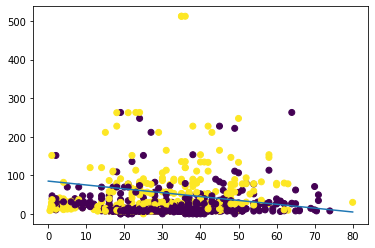

In [6]:
#@title
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Fare'],c=df['Survived'])
plt.plot([0, 80], [85, 5])

In [8]:
print("did not survive  " + str(A[0]))
print("survived "+ str(A[1]))
model.predict(A) #Now we can use the predict method to make predictions. 
print(model.predict(A[:5])) 

did not survive  [22.    7.25]
survived [38.     71.2833]
[0 1 0 0 0]


Score the Model

In [9]:
y_pred = model.predict(A) # array of prediction
y == y_pred # array of boolean whether the prediction is correct or not
print((y == y_pred).sum()) #887 datapoints in the model 580 predicted correctly
print(model.score(A, y)) #print((y == y_pred).sum() / y.shape[0])

580
0.6538895152198422
